### 데이터 전처리

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

# 대부분이 만족이고 불만족인 데이터는 일부 -> ROC-AUC로 평가하는 것이 적절
cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
# 각 피처의 값 분포 확인
cust_df.describe( )

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
# -99999는 너무 편차가 심하기 때문에 최빈값인 2로 변경
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [6]:
# 타겟 값의 분포가 원본 데이터와 유사하게 만들어졌는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


- 학습 시간이 많이 필요한 ML모델인 경우, 먼저 2~3개의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤에 이 최적 파라미터를 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝을 수행하는 것이 좋다.

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [15]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802656	validation_1-auc:0.807919
[2]	validation_0-auc:0.80013	validation_1-auc:0.804948
[3]	validation_0-auc:0.805843	validation_1-auc:0.809844
[4]	validation_0-auc:0.814728	validation_1-auc:0.817554
[5]	validation_0-auc:0.80989	validation_1-auc:0.812919
[6]	validation_0-auc:0.80994	validation_1-auc:0.813688
[7]	validation_0-auc:0.818246	validation_1-auc:0.820487
[8]	validation_0-auc:0.821681	validation_1-auc:0.823214
[9]	validation_0-auc:0.819933	validation_1-auc:0.821108
[10]	validation_0-auc:0.825898	validation_1-auc:0.825134
[11]	validation_0-auc:0.829776	validation_1-auc:0.827521
[12]	validation_0-auc:0.832087	validation_1-auc:0.828878
[13]	validation_0-auc:0.83185	validation_1-auc:0.827989
[14]	validation_0-auc:0.830253	validation_1-auc:0.826429
[1

[50]	validation_0-auc:0.86211	validation_1-auc:0.842776
[51]	validation_0-auc:0.863213	validation_1-auc:0.843216
[52]	validation_0-auc:0.863963	validation_1-auc:0.844009
[53]	validation_0-auc:0.864482	validation_1-auc:0.844648
[54]	validation_0-auc:0.865133	validation_1-auc:0.844937
[55]	validation_0-auc:0.865492	validation_1-auc:0.844709
[56]	validation_0-auc:0.865993	validation_1-auc:0.844996
[57]	validation_0-auc:0.866332	validation_1-auc:0.845129
[58]	validation_0-auc:0.866537	validation_1-auc:0.844909
[59]	validation_0-auc:0.866757	validation_1-auc:0.844844
[60]	validation_0-auc:0.867255	validation_1-auc:0.844642
[61]	validation_0-auc:0.867647	validation_1-auc:0.844413
[62]	validation_0-auc:0.86778	validation_1-auc:0.844403
[63]	validation_0-auc:0.868042	validation_1-auc:0.844125
[64]	validation_0-auc:0.868285	validation_1-auc:0.844139
[65]	validation_0-auc:0.868816	validation_1-auc:0.844317
[66]	validation_0-auc:0.868901	validation_1-auc:0.844326
[67]	validation_0-auc:0.869074	va

[12]	validation_0-auc:0.832194	validation_1-auc:0.830867
[13]	validation_0-auc:0.832881	validation_1-auc:0.830585
[14]	validation_0-auc:0.83105	validation_1-auc:0.829088
[15]	validation_0-auc:0.834064	validation_1-auc:0.830594
[16]	validation_0-auc:0.836488	validation_1-auc:0.832439
[17]	validation_0-auc:0.838566	validation_1-auc:0.834435
[18]	validation_0-auc:0.841291	validation_1-auc:0.836339
[19]	validation_0-auc:0.840159	validation_1-auc:0.835519
[20]	validation_0-auc:0.841893	validation_1-auc:0.836441
[21]	validation_0-auc:0.841405	validation_1-auc:0.836036
[22]	validation_0-auc:0.840321	validation_1-auc:0.834835
[23]	validation_0-auc:0.84251	validation_1-auc:0.837768
[24]	validation_0-auc:0.844119	validation_1-auc:0.839223
[25]	validation_0-auc:0.84386	validation_1-auc:0.83757
[26]	validation_0-auc:0.843624	validation_1-auc:0.836767
[27]	validation_0-auc:0.845274	validation_1-auc:0.838187
[28]	validation_0-auc:0.846582	validation_1-auc:0.839603
[29]	validation_0-auc:0.84632	valid

[66]	validation_0-auc:0.866101	validation_1-auc:0.844762
[67]	validation_0-auc:0.866303	validation_1-auc:0.844544
[68]	validation_0-auc:0.866493	validation_1-auc:0.844325
[69]	validation_0-auc:0.866651	validation_1-auc:0.844105
[70]	validation_0-auc:0.866761	validation_1-auc:0.84405
[71]	validation_0-auc:0.866972	validation_1-auc:0.844211
[72]	validation_0-auc:0.867151	validation_1-auc:0.844122
[73]	validation_0-auc:0.867376	validation_1-auc:0.844185
[74]	validation_0-auc:0.867442	validation_1-auc:0.844186
[75]	validation_0-auc:0.867606	validation_1-auc:0.84417
[76]	validation_0-auc:0.86786	validation_1-auc:0.844023
[77]	validation_0-auc:0.86797	validation_1-auc:0.844189
[78]	validation_0-auc:0.868345	validation_1-auc:0.844065
[79]	validation_0-auc:0.868528	validation_1-auc:0.844039
[80]	validation_0-auc:0.868618	validation_1-auc:0.844043
[81]	validation_0-auc:0.868874	validation_1-auc:0.844012
[82]	validation_0-auc:0.869039	validation_1-auc:0.84399
[83]	validation_0-auc:0.869377	valid

[16]	validation_0-auc:0.848975	validation_1-auc:0.835177
[17]	validation_0-auc:0.851268	validation_1-auc:0.836379
[18]	validation_0-auc:0.853478	validation_1-auc:0.836386
[19]	validation_0-auc:0.852335	validation_1-auc:0.835925
[20]	validation_0-auc:0.855544	validation_1-auc:0.836983
[21]	validation_0-auc:0.855553	validation_1-auc:0.836397
[22]	validation_0-auc:0.855033	validation_1-auc:0.834445
[23]	validation_0-auc:0.856963	validation_1-auc:0.836413
[24]	validation_0-auc:0.85907	validation_1-auc:0.838012
[25]	validation_0-auc:0.859496	validation_1-auc:0.836454
[26]	validation_0-auc:0.860395	validation_1-auc:0.836356
[27]	validation_0-auc:0.862315	validation_1-auc:0.837705
[28]	validation_0-auc:0.864206	validation_1-auc:0.837761
[29]	validation_0-auc:0.863938	validation_1-auc:0.837658
[30]	validation_0-auc:0.865498	validation_1-auc:0.83833
[31]	validation_0-auc:0.866862	validation_1-auc:0.839237
[32]	validation_0-auc:0.86727	validation_1-auc:0.837928
[33]	validation_0-auc:0.86829	vali

[95]	validation_0-auc:0.894718	validation_1-auc:0.841673
Stopping. Best iteration:
[65]	validation_0-auc:0.888902	validation_1-auc:0.843524

[0]	validation_0-auc:0.736837	validation_1-auc:0.734096
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822074	validation_1-auc:0.815712
[2]	validation_0-auc:0.814373	validation_1-auc:0.806888
[3]	validation_0-auc:0.828324	validation_1-auc:0.821214
[4]	validation_0-auc:0.832905	validation_1-auc:0.825577
[5]	validation_0-auc:0.82953	validation_1-auc:0.822776
[6]	validation_0-auc:0.830211	validation_1-auc:0.822255
[7]	validation_0-auc:0.833664	validation_1-auc:0.825988
[8]	validation_0-auc:0.839	validation_1-auc:0.82913
[9]	validation_0-auc:0.838751	validation_1-auc:0.828431
[10]	validation_0-auc:0.843419	validation_1-auc:0.830844
[11]	validation_0-auc:0.845813	validation_1-auc:0.833661
[12]	validation_0-auc:0.847898	va

[45]	validation_0-auc:0.870867	validation_1-auc:0.836073
[46]	validation_0-auc:0.872491	validation_1-auc:0.836406
[47]	validation_0-auc:0.873587	validation_1-auc:0.837012
[48]	validation_0-auc:0.873936	validation_1-auc:0.83661
[49]	validation_0-auc:0.874852	validation_1-auc:0.836541
[50]	validation_0-auc:0.87495	validation_1-auc:0.835912
[51]	validation_0-auc:0.875651	validation_1-auc:0.836387
[52]	validation_0-auc:0.876333	validation_1-auc:0.836816
[53]	validation_0-auc:0.876628	validation_1-auc:0.837388
[54]	validation_0-auc:0.877094	validation_1-auc:0.837832
[55]	validation_0-auc:0.877855	validation_1-auc:0.83797
[56]	validation_0-auc:0.87859	validation_1-auc:0.838514
[57]	validation_0-auc:0.878867	validation_1-auc:0.838492
[58]	validation_0-auc:0.87909	validation_1-auc:0.838433
[59]	validation_0-auc:0.879142	validation_1-auc:0.838469
[60]	validation_0-auc:0.879478	validation_1-auc:0.83843
[61]	validation_0-auc:0.879742	validation_1-auc:0.838421
Stopping. Best iteration:
[31]	valida

[21]	validation_0-auc:0.856136	validation_1-auc:0.837891
[22]	validation_0-auc:0.85573	validation_1-auc:0.837673
[23]	validation_0-auc:0.857501	validation_1-auc:0.837776
[24]	validation_0-auc:0.858376	validation_1-auc:0.83902
[25]	validation_0-auc:0.858584	validation_1-auc:0.838329
[26]	validation_0-auc:0.858925	validation_1-auc:0.837917
[27]	validation_0-auc:0.859719	validation_1-auc:0.839459
[28]	validation_0-auc:0.861408	validation_1-auc:0.839827
[29]	validation_0-auc:0.861979	validation_1-auc:0.839394
[30]	validation_0-auc:0.863815	validation_1-auc:0.840433
[31]	validation_0-auc:0.865709	validation_1-auc:0.841593
[32]	validation_0-auc:0.865927	validation_1-auc:0.839924
[33]	validation_0-auc:0.866076	validation_1-auc:0.839817
[34]	validation_0-auc:0.865947	validation_1-auc:0.839194
[35]	validation_0-auc:0.867983	validation_1-auc:0.840204
[36]	validation_0-auc:0.869748	validation_1-auc:0.840745
[37]	validation_0-auc:0.869883	validation_1-auc:0.840638
[38]	validation_0-auc:0.869663	va

[64]	validation_0-auc:0.868086	validation_1-auc:0.838147
[65]	validation_0-auc:0.868253	validation_1-auc:0.838083
[66]	validation_0-auc:0.86836	validation_1-auc:0.838071
Stopping. Best iteration:
[36]	validation_0-auc:0.855359	validation_1-auc:0.840182

[0]	validation_0-auc:0.808752	validation_1-auc:0.799538
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814155	validation_1-auc:0.808631
[2]	validation_0-auc:0.822097	validation_1-auc:0.818521
[3]	validation_0-auc:0.824996	validation_1-auc:0.821016
[4]	validation_0-auc:0.825963	validation_1-auc:0.822125
[5]	validation_0-auc:0.828318	validation_1-auc:0.821873
[6]	validation_0-auc:0.830602	validation_1-auc:0.821908
[7]	validation_0-auc:0.831274	validation_1-auc:0.822271
[8]	validation_0-auc:0.832728	validation_1-auc:0.823545
[9]	validation_0-auc:0.834143	validation_1-auc:0.824065
[10]	validation_0-auc:0.83516

[35]	validation_0-auc:0.856007	validation_1-auc:0.840675
[36]	validation_0-auc:0.856613	validation_1-auc:0.84121
[37]	validation_0-auc:0.85704	validation_1-auc:0.841175
[38]	validation_0-auc:0.858183	validation_1-auc:0.84155
[39]	validation_0-auc:0.858743	validation_1-auc:0.842177
[40]	validation_0-auc:0.859182	validation_1-auc:0.842212
[41]	validation_0-auc:0.859824	validation_1-auc:0.842693
[42]	validation_0-auc:0.860398	validation_1-auc:0.842827
[43]	validation_0-auc:0.860834	validation_1-auc:0.84255
[44]	validation_0-auc:0.861246	validation_1-auc:0.842194
[45]	validation_0-auc:0.861927	validation_1-auc:0.842308
[46]	validation_0-auc:0.862073	validation_1-auc:0.842397
[47]	validation_0-auc:0.862353	validation_1-auc:0.842439
[48]	validation_0-auc:0.862928	validation_1-auc:0.842538
[49]	validation_0-auc:0.863425	validation_1-auc:0.8424
[50]	validation_0-auc:0.864056	validation_1-auc:0.842676
[51]	validation_0-auc:0.864357	validation_1-auc:0.842524
[52]	validation_0-auc:0.864609	valida

Stopping. Best iteration:
[52]	validation_0-auc:0.860766	validation_1-auc:0.840366

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816145	validation_1-auc:0.80958
[2]	validation_0-auc:0.823006	validation_1-auc:0.815162
[3]	validation_0-auc:0.826799	validation_1-auc:0.820588
[4]	validation_0-auc:0.828171	validation_1-auc:0.822185
[5]	validation_0-auc:0.830317	validation_1-auc:0.821841
[6]	validation_0-auc:0.831526	validation_1-auc:0.82214
[7]	validation_0-auc:0.833025	validation_1-auc:0.823823
[8]	validation_0-auc:0.833822	validation_1-auc:0.824124
[9]	validation_0-auc:0.835479	validation_1-auc:0.825068
[10]	validation_0-auc:0.83707	validation_1-auc:0.82645
[11]	validation_0-auc:0.838077	validation_1-auc:0.828302
[12]	validation_0-auc:0.838651	validation_1-auc:0.828116
[13]	validation_0-auc:0.83997	va

[43]	validation_0-auc:0.858114	validation_1-auc:0.840437
[44]	validation_0-auc:0.8587	validation_1-auc:0.840393
[45]	validation_0-auc:0.859208	validation_1-auc:0.840227
[46]	validation_0-auc:0.859787	validation_1-auc:0.840334
[47]	validation_0-auc:0.860175	validation_1-auc:0.840495
[48]	validation_0-auc:0.860447	validation_1-auc:0.840604
[49]	validation_0-auc:0.860756	validation_1-auc:0.840793
[50]	validation_0-auc:0.8614	validation_1-auc:0.841389
[51]	validation_0-auc:0.861773	validation_1-auc:0.841365
[52]	validation_0-auc:0.861854	validation_1-auc:0.84153
[53]	validation_0-auc:0.862384	validation_1-auc:0.84149
[54]	validation_0-auc:0.862676	validation_1-auc:0.841725
[55]	validation_0-auc:0.862848	validation_1-auc:0.841829
[56]	validation_0-auc:0.863278	validation_1-auc:0.841768
[57]	validation_0-auc:0.86356	validation_1-auc:0.841612
[58]	validation_0-auc:0.86411	validation_1-auc:0.841675
[59]	validation_0-auc:0.864374	validation_1-auc:0.841882
[60]	validation_0-auc:0.864549	validati

[21]	validation_0-auc:0.862989	validation_1-auc:0.838228
[22]	validation_0-auc:0.86408	validation_1-auc:0.838505
[23]	validation_0-auc:0.864833	validation_1-auc:0.839339
[24]	validation_0-auc:0.865275	validation_1-auc:0.839364
[25]	validation_0-auc:0.867226	validation_1-auc:0.839368
[26]	validation_0-auc:0.868347	validation_1-auc:0.839987
[27]	validation_0-auc:0.868822	validation_1-auc:0.839718
[28]	validation_0-auc:0.869747	validation_1-auc:0.839315
[29]	validation_0-auc:0.870582	validation_1-auc:0.839963
[30]	validation_0-auc:0.871132	validation_1-auc:0.840295
[31]	validation_0-auc:0.871655	validation_1-auc:0.8402
[32]	validation_0-auc:0.872709	validation_1-auc:0.840605
[33]	validation_0-auc:0.873597	validation_1-auc:0.840609
[34]	validation_0-auc:0.874485	validation_1-auc:0.841155
[35]	validation_0-auc:0.875671	validation_1-auc:0.840878
[36]	validation_0-auc:0.876407	validation_1-auc:0.840645
[37]	validation_0-auc:0.877606	validation_1-auc:0.840808
[38]	validation_0-auc:0.878592	val

[23]	validation_0-auc:0.859264	validation_1-auc:0.838275
[24]	validation_0-auc:0.859998	validation_1-auc:0.839437
[25]	validation_0-auc:0.860713	validation_1-auc:0.839528
[26]	validation_0-auc:0.861887	validation_1-auc:0.839759
[27]	validation_0-auc:0.862421	validation_1-auc:0.839912
[28]	validation_0-auc:0.863272	validation_1-auc:0.839747
[29]	validation_0-auc:0.864173	validation_1-auc:0.839941
[30]	validation_0-auc:0.864581	validation_1-auc:0.840214
[31]	validation_0-auc:0.865165	validation_1-auc:0.840243
[32]	validation_0-auc:0.865982	validation_1-auc:0.839967
[33]	validation_0-auc:0.867174	validation_1-auc:0.840393
[34]	validation_0-auc:0.867784	validation_1-auc:0.84028
[35]	validation_0-auc:0.868347	validation_1-auc:0.839926
[36]	validation_0-auc:0.869124	validation_1-auc:0.839652
[37]	validation_0-auc:0.86975	validation_1-auc:0.83957
[38]	validation_0-auc:0.870294	validation_1-auc:0.839306
[39]	validation_0-auc:0.870689	validation_1-auc:0.83959
[40]	validation_0-auc:0.871538	vali

[0]	validation_0-auc:0.822547	validation_1-auc:0.816922
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828707	validation_1-auc:0.82115
[2]	validation_0-auc:0.831882	validation_1-auc:0.821944
[3]	validation_0-auc:0.834654	validation_1-auc:0.82446
[4]	validation_0-auc:0.835563	validation_1-auc:0.825211
[5]	validation_0-auc:0.839081	validation_1-auc:0.827422
[6]	validation_0-auc:0.840656	validation_1-auc:0.828467
[7]	validation_0-auc:0.840958	validation_1-auc:0.829569
[8]	validation_0-auc:0.842797	validation_1-auc:0.830023
[9]	validation_0-auc:0.844924	validation_1-auc:0.832305
[10]	validation_0-auc:0.845608	validation_1-auc:0.831611
[11]	validation_0-auc:0.84683	validation_1-auc:0.832827
[12]	validation_0-auc:0.848602	validation_1-auc:0.832492
[13]	validation_0-auc:0.851937	validation_1-auc:0.834248
[14]	validation_0-auc:0.852856	validation_1-auc:0.834055
[

[48]	validation_0-auc:0.898112	validation_1-auc:0.843112
[49]	validation_0-auc:0.898969	validation_1-auc:0.843815
[50]	validation_0-auc:0.899723	validation_1-auc:0.843616
[51]	validation_0-auc:0.900311	validation_1-auc:0.843351
[52]	validation_0-auc:0.90076	validation_1-auc:0.843224
[53]	validation_0-auc:0.901219	validation_1-auc:0.843209
[54]	validation_0-auc:0.901953	validation_1-auc:0.84299
[55]	validation_0-auc:0.902292	validation_1-auc:0.843091
[56]	validation_0-auc:0.902796	validation_1-auc:0.842737
[57]	validation_0-auc:0.903409	validation_1-auc:0.842502
[58]	validation_0-auc:0.904051	validation_1-auc:0.842664
[59]	validation_0-auc:0.904293	validation_1-auc:0.842771
[60]	validation_0-auc:0.904655	validation_1-auc:0.842501
[61]	validation_0-auc:0.904978	validation_1-auc:0.842503
[62]	validation_0-auc:0.905361	validation_1-auc:0.8426
[63]	validation_0-auc:0.906145	validation_1-auc:0.842635
[64]	validation_0-auc:0.90649	validation_1-auc:0.842556
[65]	validation_0-auc:0.907426	valid

In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

- 앙상블 계열 알고리즘은 과적합/잡음에 기본적으로 뛰어나기 때문에 하피퍼 파라미터 튜닝으로 성능 수치 개선이 급격하게 되는 경우가 적음

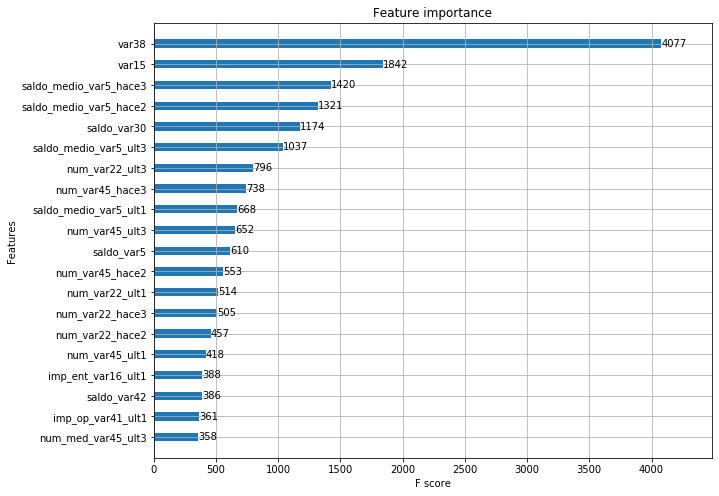

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 

[34]	valid_0's auc: 0.876841	valid_0's binary_logloss: 0.123372	valid_1's auc: 0.839078	valid_1's binary_logloss: 0.139459
[35]	valid_0's auc: 0.877422	valid_0's binary_logloss: 0.123118	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139362
[36]	valid_0's auc: 0.878163	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139395
[37]	valid_0's auc: 0.87856	valid_0's binary_logloss: 0.122649	valid_1's auc: 0.839051	valid_1's binary_logloss: 0.139443
[38]	valid_0's auc: 0.879102	valid_0's binary_logloss: 0.122415	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139378
[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc:

[9]	valid_0's auc: 0.852419	valid_0's binary_logloss: 0.135296	valid_1's auc: 0.837736	valid_1's binary_logloss: 0.145412
[10]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.134224	valid_1's auc: 0.838661	valid_1's binary_logloss: 0.144501
[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc

[16]	valid_0's auc: 0.859941	valid_0's binary_logloss: 0.129973	valid_1's auc: 0.837854	valid_1's binary_logloss: 0.141803
[17]	valid_0's auc: 0.861036	valid_0's binary_logloss: 0.129377	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.141476
[18]	valid_0's auc: 0.862799	valid_0's binary_logloss: 0.128809	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.141125
[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc

[27]	valid_0's auc: 0.88693	valid_0's binary_logloss: 0.119952	valid_1's auc: 0.829491	valid_1's binary_logloss: 0.141578
[28]	valid_0's auc: 0.887827	valid_0's binary_logloss: 0.1195	valid_1's auc: 0.829533	valid_1's binary_logloss: 0.141548
[29]	valid_0's auc: 0.888834	valid_0's binary_logloss: 0.119055	valid_1's auc: 0.829809	valid_1's binary_logloss: 0.141549
[30]	valid_0's auc: 0.889728	valid_0's binary_logloss: 0.118695	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.14162
[31]	valid_0's auc: 0.890934	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141525
[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.

[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[14]	valid_0's auc: 0.872498	valid_0's binary_logloss: 0.127408	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.142262
[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc:

[9]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.135648	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.145198
[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 

[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc: 0.880499	valid_0's binary_logloss: 0.121624	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.139091
[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc

[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc: 0.876802	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.139955
Early stopping, best iteration is:
[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_l

[27]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13973
[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0.870611	valid_0's binary_logloss: 0.125574	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.139586
[30]	valid_0's auc: 0.871288	valid_0's binary_logloss: 0.125351	valid_1's auc: 0.838578	valid_1's binary_logloss: 0.139533
[31]	valid_0's auc: 0.871941	valid_0's binary_logloss: 0.125092	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139431
[32]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.124816	valid_1's auc: 0.839243	valid_1's binary_logloss: 0.139362
[33]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139288
[34]	valid_0's auc: 0.874317	valid_0's binary_logloss: 0.124327	valid_1's auc: 0.839612	valid_1's binary_logloss: 0.139266
[35]	valid_0's auc

[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's au

[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_lo

[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's auc: 0.884175	valid_0's binary_logloss: 0.121053	valid_1's auc: 0.831077	valid_1's binary_logloss: 0.140897
[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's au

[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_loglos

[26]	valid_0's auc: 0.870271	valid_0's binary_logloss: 0.12561	valid_1's auc: 0.834087	valid_1's binary_logloss: 0.140349
[27]	valid_0's auc: 0.87126	valid_0's binary_logloss: 0.125302	valid_1's auc: 0.833822	valid_1's binary_logloss: 0.140277
[28]	valid_0's auc: 0.872741	valid_0's binary_logloss: 0.124882	valid_1's auc: 0.833886	valid_1's binary_logloss: 0.140255
[29]	valid_0's auc: 0.873424	valid_0's binary_logloss: 0.124594	valid_1's auc: 0.833937	valid_1's binary_logloss: 0.140189
[30]	valid_0's auc: 0.874669	valid_0's binary_logloss: 0.124295	valid_1's auc: 0.834461	valid_1's binary_logloss: 0.140113
[31]	valid_0's auc: 0.875234	valid_0's binary_logloss: 0.124066	valid_1's auc: 0.83444	valid_1's binary_logloss: 0.140064
[32]	valid_0's auc: 0.875809	valid_0's binary_logloss: 0.123813	valid_1's auc: 0.834196	valid_1's binary_logloss: 0.140095
[33]	valid_0's auc: 0.876619	valid_0's binary_logloss: 0.123531	valid_1's auc: 0.834143	valid_1's binary_logloss: 0.140029
[34]	valid_0's auc:

[56]	valid_0's auc: 0.887901	valid_0's binary_logloss: 0.118796	valid_1's auc: 0.838303	valid_1's binary_logloss: 0.139748
[57]	valid_0's auc: 0.888238	valid_0's binary_logloss: 0.118604	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139719
[58]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118451	valid_1's auc: 0.838262	valid_1's binary_logloss: 0.139754
[59]	valid_0's auc: 0.889294	valid_0's binary_logloss: 0.11824	valid_1's auc: 0.837652	valid_1's binary_logloss: 0.139829
Early stopping, best iteration is:
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_log

[10]	valid_0's auc: 0.852371	valid_0's binary_logloss: 0.134185	valid_1's auc: 0.839808	valid_1's binary_logloss: 0.144182
[11]	valid_0's auc: 0.853705	valid_0's binary_logloss: 0.133238	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.14345
[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.860428	valid_0's binary_logloss: 0.129814	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.141389
[17]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.141106
[18]	valid_0's auc: 0

[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc: 0.884968	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.139667
[49]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.83827	valid_1's binary_logloss: 0.13968
[50]	valid_0's auc: 0.8

[49]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.83995	valid_1's binary_logloss: 0.139355
[50]	valid_0's auc: 0.885102	valid_0's binary_logloss: 0.120013	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.13936
[51]	valid_0's auc: 0.885668	valid_0's binary_logloss: 0.119856	valid_1's auc: 0.839722	valid_1's binary_logloss: 0.139361
[52]	valid_0's auc: 0.886053	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.839593	valid_1's binary_logloss: 0.139409
[53]	valid_0's auc: 0.886187	valid_0's binary_logloss: 0.119567	valid_1's auc: 0.839723	valid_1's binary_logloss: 0.139436
[54]	valid_0's auc: 0.886397	valid_0's binary_logloss: 0.11943	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139424
[55]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.839951	valid_1's binary_logloss: 0.139433
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_lo

[22]	valid_0's auc: 0.883688	valid_0's binary_logloss: 0.121776	valid_1's auc: 0.836698	valid_1's binary_logloss: 0.140127
[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 0.887311	valid_0's binary_logloss: 0.120104	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.139879
[26]	valid_0's auc: 0.888754	valid_0's binary_logloss: 0.11961	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139895
[27]	valid_0's auc: 0.889697	valid_0's binary_logloss: 0.119114	valid_1's auc: 0.836828	valid_1's binary_logloss: 0.139904
[28]	valid_0's auc: 0.891102	valid_0's binary_logloss: 0.118637	valid_1's auc: 0.83685	valid_1's binary_logloss: 0.139833
[29]	valid_0's auc: 0.891823	valid_0's binary_logloss: 0.118217	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.139836
[30]	valid_0's auc: 0.

[42]	valid_0's auc: 0.898936	valid_0's binary_logloss: 0.114144	valid_1's auc: 0.836485	valid_1's binary_logloss: 0.14011
[43]	valid_0's auc: 0.899275	valid_0's binary_logloss: 0.11385	valid_1's auc: 0.836213	valid_1's binary_logloss: 0.140214
Early stopping, best iteration is:
[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logl

[31]	valid_0's auc: 0.893688	valid_0's binary_logloss: 0.117412	valid_1's auc: 0.83732	valid_1's binary_logloss: 0.139721
[32]	valid_0's auc: 0.894643	valid_0's binary_logloss: 0.117013	valid_1's auc: 0.8373	valid_1's binary_logloss: 0.1397
[33]	valid_0's auc: 0.89555	valid_0's binary_logloss: 0.11666	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.139692
[34]	valid_0's auc: 0.896334	valid_0's binary_logloss: 0.116252	valid_1's auc: 0.836971	valid_1's binary_logloss: 0.139746
[35]	valid_0's auc: 0.897058	valid_0's binary_logloss: 0.115923	valid_1's auc: 0.837212	valid_1's binary_logloss: 0.139756
[36]	valid_0's auc: 0.897581	valid_0's binary_logloss: 0.115642	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.139719
[37]	valid_0's auc: 0.898111	valid_0's binary_logloss: 0.115297	valid_1's auc: 0.83733	valid_1's binary_logloss: 0.139758
[38]	valid_0's auc: 0.898762	valid_0's binary_logloss: 0.11499	valid_1's auc: 0.837353	valid_1's binary_logloss: 0.13975
[39]	valid_0's auc: 0.8994

[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.1453
[10]	valid_0's auc: 0.850856	valid_0's binary_logloss: 0.134808	valid_1's auc: 0.837498	valid_1's binary_logloss: 0.144374
[11]	valid_0's auc: 0.852026	valid_0's binary_logloss: 0.133912	valid_1's auc: 0.836992	valid_1's binary_logloss: 0.143626
[12]	valid_0's auc: 0.853769	valid_0's binary_logloss: 0.133022	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.143124
[13]	valid_0's auc: 0.85483	valid_0's binary_logloss: 0.132302	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.142528
[14]	valid_0's auc: 0.855718	valid_0's binary_logloss: 0.131638	valid_1's auc: 0.835694	valid_1's binary_logloss: 0.142224
[15]	valid_0's auc: 0.856954	valid_0's binary_logloss: 0.131049	valid_1's auc: 0.835368	valid_1's binary_logloss: 0.141812
[16]	valid_0's auc: 0.857856	valid_0's binary_logloss: 0.130502	valid_1's auc: 0.834835	valid_1's binary_logloss: 0.141587
[17]	valid_0's auc: 

[37]	valid_0's auc: 0.875726	valid_0's binary_logloss: 0.123495	valid_1's auc: 0.839391	valid_1's binary_logloss: 0.139005
Early stopping, best iteration is:
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_loglo

[67]	valid_0's auc: 0.886435	valid_0's binary_logloss: 0.118836	valid_1's auc: 0.83953	valid_1's binary_logloss: 0.139595
[68]	valid_0's auc: 0.886593	valid_0's binary_logloss: 0.118728	valid_1's auc: 0.839422	valid_1's binary_logloss: 0.139608
[69]	valid_0's auc: 0.886791	valid_0's binary_logloss: 0.118595	valid_1's auc: 0.839492	valid_1's binary_logloss: 0.139615
[70]	valid_0's auc: 0.886904	valid_0's binary_logloss: 0.118527	valid_1's auc: 0.83981	valid_1's binary_logloss: 0.139598
[71]	valid_0's auc: 0.887299	valid_0's binary_logloss: 0.118387	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.139594
[72]	valid_0's auc: 0.887483	valid_0's binary_logloss: 0.118281	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139654
[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc

[19]	valid_0's auc: 0.86298	valid_0's binary_logloss: 0.12873	valid_1's auc: 0.837848	valid_1's binary_logloss: 0.14042
[20]	valid_0's auc: 0.863577	valid_0's binary_logloss: 0.128318	valid_1's auc: 0.837708	valid_1's binary_logloss: 0.140222
[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 0.865788	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139856
[24]	valid_0's auc: 0.866662	valid_0's binary_logloss: 0.126815	valid_1's auc: 0.837785	valid_1's binary_logloss: 0.139755
[25]	valid_0's auc: 0.867441	valid_0's binary_logloss: 0.126498	valid_1's auc: 0.838008	valid_1's binary_logloss: 0.139673
[26]	valid_0's auc: 0.86805	valid_0's binary_logloss: 0.126176	valid_1's auc: 0.838301	valid_1's binary_logloss: 0.139585
[27]	valid_0's auc: 

[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc: 0.881689	valid_0's binary_logloss: 0.121135	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139144
[52]	valid_0's auc: 0.882122	valid_0's binary_logloss: 0.12097	valid_1's auc: 0.839978	valid_1's binary_logloss: 0.139193
[53]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.120863	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139241
[54]	valid_0's auc: 0.882575	valid_0's binary_logloss: 0.120721	valid_1's auc: 0.839521	valid_1's binary_logloss: 0.139335
[55]	valid_0's auc: 0.88311	valid_0's binary_logloss: 0.120518	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139336
[56]	valid_0's auc: 0.883389	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139326
[57]	valid_0's auc: 

[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, best iteration is:
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary

[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.87919	valid_0's binary_logloss: 0.123881	valid_1's auc: 0.837511	valid_1's binary_logloss: 0.140273
[22]	valid_0's auc: 0.880273	valid_0's binary_logloss: 0.123358	valid_1's auc: 0.837479	valid_1's binary_logloss: 0.14014
[23]	valid_0's auc: 0.881151	valid_0's binary_logloss: 0.122898	valid_1's auc: 0.837864	valid_1's binary_logloss: 0.139991
[24]	valid_0's auc: 0.882264	valid_0's binary_logloss: 0.122383	valid_1's auc: 0.8378	valid_1's binary_logloss: 0.139955
[25]	valid_0's auc: 0

[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, best iteration is:
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_

[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.87919	valid_0's binary_logloss: 0.123881	valid_1's auc: 0.837511	valid_1's binary_logloss: 0.140273
[22]	valid_0's auc:

[37]	valid_0's auc: 0.885953	valid_0's binary_logloss: 0.121404	valid_1's auc: 0.842654	valid_1's binary_logloss: 0.138558
[38]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.121133	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.138548
[39]	valid_0's auc: 0.887995	valid_0's binary_logloss: 0.120851	valid_1's auc: 0.842756	valid_1's binary_logloss: 0.138472
[40]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.842976	valid_1's binary_logloss: 0.138411
[41]	valid_0's auc: 0.889439	valid_0's binary_logloss: 0.120343	valid_1's auc: 0.843062	valid_1's binary_logloss: 0.138364
[42]	valid_0's auc: 0.890032	valid_0's binary_logloss: 0.120105	valid_1's auc: 0.842992	valid_1's binary_logloss: 0.138358
[43]	valid_0's auc: 0.890657	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.843118	valid_1's binary_logloss: 0.138331
[44]	valid_0's auc: 0.891757	valid_0's binary_logloss: 0.119626	valid_1's auc: 0.843283	valid_1's binary_logloss: 0.1383
[45]	valid_0's auc:

In [14]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss